Using TensorFlow backend.


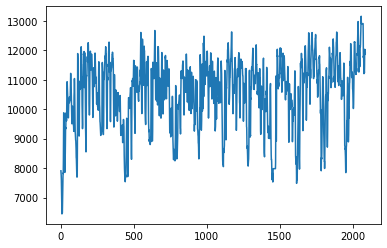

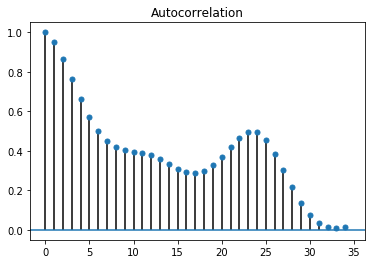

P-value is 3.3622812446370863e-09
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                 2086
Model:                 ARIMA(5, 2, 0)   Log Likelihood              -15075.450
Method:                       css-mle   S.D. of innovations            332.937
Date:                Tue, 31 Mar 2020   AIC                          30164.900
Time:                        22:03:15   BIC                          30204.401
Sample:                             2   HQIC                         30179.373
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0730      3.692      0.020      0.984      -7.163       7.309
ar.L1.D2.y    -0.2295      0.022    -10.543      0.000      -0.272      -0.187
ar.L2.D2.y    -0.3

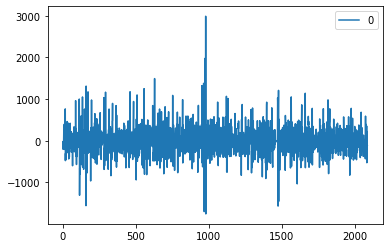

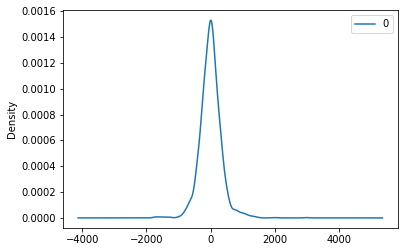

                 0
count  2086.000000
mean     -0.057376
std     333.018019
min   -1756.710840
25%    -184.113970
50%      -1.329092
75%     170.290858
max    2986.625301


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras import regularizers
from keras.constraints import maxnorm
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA, ARIMA


# The models were done by hour using all the days of the week
data = pd.read_excel("C:/Users/ERIC/Desktop/PML-06MTP-115/06MTP 01012020.xlsm",squeeze=True, sheet_name = 0)

demand = data.iloc[:,3].values
# Plot all the data
plt.figure()
plt.plot(demand)
plt.show()
# Plot autocorrelation function
plot_acf(demand, alpha =1 )
plt.show()
#Dickey fuller test
results = adfuller(demand)
print("P-value is", results[1])
# fit model
model = ARIMA(demand, order=(5,2,0))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
# there may still be some trend information not captured by the model.
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# the errors are Gaussian
residuals.plot(kind='kde')
plt.show()
# The distribution of the residual errors is displayed. 
# The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).
print(residuals.describe())

predicted=12488.626961, expected=12575.430000
predicted=12789.984081, expected=12781.200000
predicted=12976.224456, expected=13025.500000
predicted=13232.331509, expected=13152.830000
predicted=13280.149374, expected=12903.580000
predicted=12768.062511, expected=12903.000000
predicted=12985.962458, expected=12903.000000
predicted=12898.674296, expected=12903.000000
predicted=12926.143741, expected=12903.000000
predicted=12906.364678, expected=12903.000000
predicted=12877.420012, expected=12903.000000
predicted=12903.065927, expected=12903.000000
predicted=12903.127863, expected=12903.000000
predicted=12903.126699, expected=12903.000000
predicted=12903.125553, expected=12903.000000
predicted=12903.128683, expected=12903.000000
predicted=12903.126220, expected=12903.000000
predicted=12903.126037, expected=12497.670000
predicted=12184.642810, expected=11751.250000
predicted=11214.658598, expected=11806.080000
predicted=11859.526647, expected=11698.330000
predicted=11480.883335, expected=1

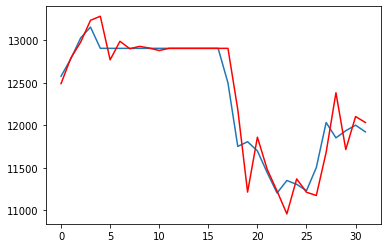

,Pred
0,12488.626961
1,12789.984081
2,12976.224456
3,13232.331509
4,13280.149374
5,12768.062511
6,12985.962458
7,12898.674296
8,12926.143741
9,12906.364678


In [6]:
size = int(len(demand) * 0.985) 
train, test = demand[0:size], demand[size:len(demand)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print(len(predictions))

for i in range(len(predictions)):
    pred = pd.DataFrame(predictions)
pred.columns = ['Pred']
# predictions = pd.DataFrame(predictions)
# predictions.columns = ['Predictions']
# history = pd.DataFrame(history)
# history.columns = ['Expected']
# values = pd.concat(predictions, history)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
pred

In [7]:
model = ARIMA(demand, order=(6,2,0))
model_fit2 = model.fit(disp=0)
forecast_demand = model_fit2.forecast(steps = 48)
forecast_demand = pd.DataFrame(forecast_demand[0])
forecast_demand.columns = ['Demand Predicted']
forecast_demand

,Demand Predicted
0,11879.570930
1,11891.049820
2,11982.834782
3,12017.967102
4,12044.486985
5,12084.335578
6,12106.618562
7,12121.626541
8,12139.185775
9,12169.859355
